<a href="https://colab.research.google.com/github/fxnnxc/NLP_visualization/blob/master/word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Cloud

Corpus(문장) 내 단어의 수를 크기로 변환하여 시각적으로 표현해줍니다

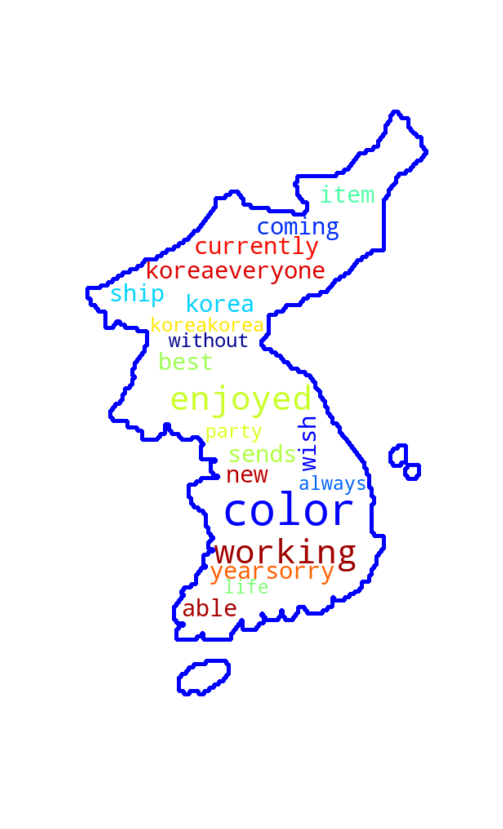

In [77]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from urllib import request
import re
import requests
from io import BytesIO


import numpy as np

% matplotlib inline

#-------------- nltk ----------------
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [119]:
dataset =[' have enjoyed working at Colors Korea',
         'Everyone here at Colors Korea sends you our best wishes for the coming New Year!',
         "We are sorry, but currently we are not able to ship items to Korea..",
          "Korea won’t be the same without him, he’s always been the life of the party."]
stop_words = set(stopwords.words("english"))

corpus = []

# 텍스트 전처리. 굳이 하지 않아도 됩니다.
for i in range(len(dataset)):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [120]:
# 마스크 이미지를 url에서 불러오기

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ9aACep8NBAyAioqO412qTTgDh5p2Ovz-VyA&usqp=CAU"
res = request.urlopen(url).read()
img = Image.open(BytesIO(res))

img = img.resize((600,1000))
mask_ = np.array(img)

for i in range(len(mask_)):
    for j in range(len(mask_[i])):
        if mask_[i][j]==0:
            mask_[i][j] = 255


(-0.5, 599.5, 999.5, -0.5)

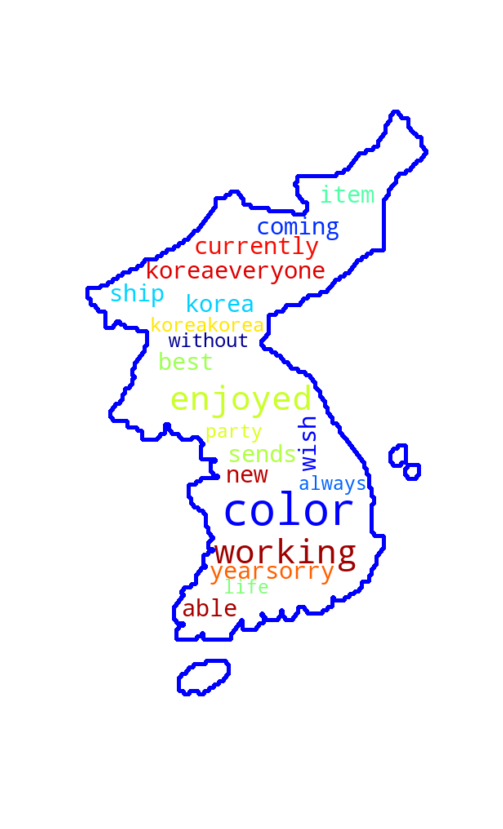

In [137]:
wordcloud = WordCloud(font_path = "", background_color="white", max_words=2000, mask=mask_,
               stopwords=stop_words, contour_width=5, contour_color="blue", colormap="jet")

wordcloud.generate("".join(corpus))

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# color map : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [123]:
help(WordCloud)

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (default=200)
 |      Height of the canvas.
 |  
 |  prefer_horizontal : float (default=0.90)
 |      The ratio of times to try horizontal fitting as opposed to vertical.
 |      If prefer_horizontal < 1, the algorithm will try rotating the word
 |      if it doesn't fit. (There is currently no built-in way to get only
 |      vertical words.)
 |  
 |  mask : nd-array or None (default=None)
 |      If not None, gives a binary mask on where to draw words. If mask is not
 |      None, width and height wil